# Autoencoder with Tensorflow

Autoencoder is the neural network which has same input and output. And it has smaller hidden layer than input layer. For this architecture, autoencoder is used for compression (actually performance is not good) and also known for image denoising. The main idea of autoencoder is that 
+ feeding the input data into the hidden unit through ``encoder`` and output those through ``decoder``
+ finding the weights which make output data similar to input data

<img src="assets/autoencoder_example.png" alt="Drawing" style="width: 500px;"/>

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


hyperparameter

In [4]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

input placeholder

In [5]:
X = tf.placeholder(tf.float32, [None, n_input])

encoder : # n_input > # n_hidden

In [6]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.matmul(X, W_encode) + b_encode)

decoder : # n_hidden < # n_output = # n_input

In [7]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.matmul(encoder, W_decode) + b_decode)

loss function

In [8]:
loss = tf.reduce_mean(tf.pow(X - decoder, 2))

optimizer

In [9]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

Learning start

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    avg_loss = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, loss_val = sess.run([optimizer, loss], feed_dict = {X:batch_xs})
        avg_loss += loss_val / total_batch
    
    print("Epoch : {:4d}, Average loss : {:.4f}".format(epoch + 1, avg_loss) )
        

image comparison : Input & Output

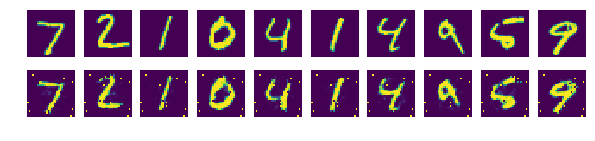

In [26]:
sample_size = 10
samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]} )

fig, ax = plt.subplots(2, sample_size, figsize = (sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()